In [1]:
import os
import shutil
import random
import PIL
from PIL import Image
import tensorflow as tf

### rename images and remove score, 对图片名重命名，去掉score值

In [2]:
def rename(path, dest):
    data = os.listdir(path)
    for item in data:
        try:
            tmp = item.split(".")
            if len(tmp)==3:
                new_name = "_".join(item.split('_')[:-2])+'.jpg'
                shutil.copy(path+'/'+item, dest+'/'+new_name)
            else:
                shutil.copy(path+'/'+item, dest+'/'+item)
        except Exception as err:
            print(err)

In [3]:
def drop_scores(path, dest):
    for subpath in os.listdir(path):
        if not os.path.exists(dest+'/'+subpath):
            os.mkdir(dest+'/'+subpath)
        try:
            rename(path+'/'+subpath, dest+'/'+subpath)
        except Exception as err:
            print(err)

In [4]:
def rename(path, dest):
    data = os.listdir(path)
    for item in data:
        try:
            tmp = item.split(".")
            if len(tmp)==3:
                new_name = "_".join(item.split('_')[:-2])+'.jpg'
                shutil.copy(path+'/'+item, dest+'/'+new_name)
            else:
                shutil.copy(path+'/'+item, dest+'/'+item)
        except Exception as err:
            print(err)

### 图片名img-01_28--15_08_29-9478--000.jpg

In [5]:
def rename2(path, dest):
    data = os.listdir(path)
    for item in data:
        try:
            tmp = item.split(".")
            if len(tmp)==2:
                new_name = "--".join(item.split('--')[:-1])+'.jpg'
                shutil.copy(path+'/'+item, dest+'/'+new_name)
            else:
                shutil.copy(path+'/'+item, dest+'/'+item)
        except Exception as err:
            print(err)
            
def drop_scores2(path, dest):
    for subpath in os.listdir(path):
        if not os.path.exists(dest+'/'+subpath):
            os.mkdir(dest+'/'+subpath)
        try:
            rename2(path+'/'+subpath, dest+'/'+subpath)
        except Exception as err:
            print(err)

In [6]:
path = "../../training/training_03_22"
dest = "../../training/training_03_22_2"

drop_scores2(path, dest)

In [26]:
path = "../../labeled_data/12_15_xinzhuang/0"
dest = "../../labeled_data/12_15_xinzhuang/0_0"

drop_scores(path, dest)

[Errno 20] Not a directory: '../../labeled_data/12_15_xinzhuang/0/.DS_Store'


In [4]:
path = "../../labeled_data/LDC/0"
dest = "../../labeled_data/LDC/0_0"

drop_scores(path, dest)

[Errno 20] Not a directory: '../../labeled_data/LDC/0/.DS_Store'


### 给定score阈值，将大于阈值的归为某一类

In [11]:
def split_by_score(path, dest, score_thr):
    images = os.listdir(path)
    for img in images:
        score = float(os.path.splitext(img)[0].split('-')[-1])
        if score >= score_thr:
            shutil.copy(path+'/'+img, dest+'/positive/'+img)
        else:
            shutil.copy(path+'/'+img, dest+'/negative/'+img)

In [13]:
path = "../../blob_raw/dest/EB9B"

dest = "../../blob_raw/dest/EB9B_split"

split_by_score(path, dest, 128)

In [44]:
path = '../data/12_23_qingpu/2/results/positive'
dest = "../data/12_23_qingpu/2/results/TP"

split_by_score(path, dest, 0.95)

In [52]:
path = "../../raw_data/01_28_ningbo/9A79"
dest = "../../results/01_28_ningbo_esp/9A79"
labeled_path = "../../labeled_data/01_28_ningbo/1"
score_thr = 10

In [53]:
def get_label(labeled_path):
    negative, positive = [], []
    for subpath in os.listdir(labeled_path):
        if subpath == 'negative':
            negative = os.listdir(labeled_path+'/'+subpath)
        else:
            positive = os.listdir(labeled_path+'/'+subpath)
    return positive, negative

In [54]:
p_sets, n_sets = get_label(labeled_path)

In [55]:
p_sets

['img-01_31--19_24_49-9A79--039.jpg',
 'img-01_29--22_24_59-9A79--255.jpg',
 'img-01_30--14_08_06-9A79--255.jpg',
 'img-01_31--12_42_10-9A79--255.jpg',
 'img-01_31--06_46_44-9A79--252.jpg',
 'img-01_30--18_36_26-9A79--255.jpg',
 'img-01_31--10_49_07-9A79--255.jpg',
 'img-01_30--17_05_53-9A79--252.jpg',
 'img-01_30--20_36_39-9A79--255.jpg',
 'img-01_29--17_09_39-9A79--255.jpg',
 'img-01_30--22_04_01-9A79--255.jpg',
 'img-01_29--20_28_58-9A79--255.jpg',
 'img-01_31--20_10_57-9A79--255.jpg',
 'img-01_29--23_43_10-9A79--001.jpg',
 'img-01_30--21_33_44-9A79--252.jpg',
 'img-01_30--19_47_41-9A79--255.jpg',
 'img-01_28--22_09_50-9A79--255.jpg',
 'img-01_31--19_02_09-9A79--255.jpg',
 'img-01_29--08_44_45-9A79--255.jpg',
 'img-01_30--11_00_03-9A79--255.jpg',
 'img-01_31--11_28_04-9A79--255.jpg',
 'img-01_30--17_31_05-9A79--076.jpg',
 'img-01_31--19_53_49-9A79--255.jpg',
 'img-01_30--15_30_33-9A79--255.jpg',
 'img-01_30--18_05_49-9A79--255.jpg',
 'img-01_31--20_52_15-9A79--253.jpg',
 'img-01_29-

In [56]:
def find_FP_FN(path, dest, p_sets, n_sets, score_thr):
    images = os.listdir(path)
    for img in images:
        score = float(os.path.splitext(img)[0].split('--')[-1])
        img_name = img
#         img_name = '--'.join(os.path.splitext(img)[0].split('--')[:-1])+'.jpg'
        if score >= score_thr:
            if img_name not in p_sets:
                shutil.copy(path+'/'+img, dest+'/FP/'+img)
        else:
            if img_name not in n_sets:
                shutil.copy(path+'/'+img, dest+'/FN/'+img)

In [57]:
find_FP_FN(path, dest, p_sets, n_sets, score_thr)

### select some images for training

In [28]:
path = "../../labeled_data/LDC/0/negative"
dest = "../../training/training_01_04/negative"
data = os.listdir(path)
s = random.sample(data, 500)
for item in s:
    shutil.copy(path+'/'+item, dest+'/'+item)

In [3]:
path = "../../training/training_01_18_relabel_bak/negative"
dest = "../../training/training_01_18_relabel_bak/原始无人"
data = os.listdir(path)
s = random.sample(data, 1500)
for item in s:
    shutil.copy(path+'/'+item, dest+'/'+item)

### split training and validation sets

In [16]:
def split_training_val(path, dest):
    random.seed(123)
    for subpath in os.listdir(path):
        if not os.path.exists(dest+'/training/'+subpath):
            os.mkdir(dest+'/training/'+subpath)
        if not os.path.exists(dest+'/val/'+subpath):
            os.mkdir(dest+'/val/'+subpath)
        try:
            data = os.listdir(path+'/'+subpath)
            training_num = int(len(data)*0.8)
            print(training_num)
            s = random.sample(data, training_num)
            for item in data:
                if item in s:
                    shutil.copy(path+'/'+subpath+'/'+item, dest+'/training/'+subpath)
                if item not in s:
                    shutil.copy(path+'/'+subpath+'/'+item, dest+'/val/'+subpath)
        except Exception as err:
            print(err)

In [33]:
path = "../../training/training_01_04"
dest = "../../training/training_01_04_split"
split_training_val(path, dest)

1600
[Errno 20] Not a directory: '../../tmp/training_12_30_bright/.DS_Store'
960


### 图像resize

In [7]:
resize_height = 120
resize_width  = 160

In [8]:
def resize_img(img_file, dest_path):
    try:
        img = Image.open(img_file)
        img_name = os.path.basename(img_file)
        img.resize((resize_width, resize_height), resample=PIL.Image.BILINEAR).save(dest_path+"/"+img_name)
    except Exception as err:
        print(err)
        
def resize(path, dest_path):
    for subpath in os.listdir(path):
        try:
            print(subpath)
            if not os.path.exists(dest_path+'/'+subpath):
                os.mkdir(dest_path+'/'+subpath)

            for item in os.listdir(path+'/'+subpath):
                img_path = path+'/'+subpath+'/'+item
                resize_img(img_path, dest_path+'/'+subpath)
        except Exception as err:
            print(err)

In [17]:
path = "../../labeled_data/01_28_ningbo/9478"
dest_path = "../../labeled_data/01_28_ningbo/9478_resize"
resize(path, dest_path)

positive
.DS_Store
[Errno 20] Not a directory: '../../labeled_data/01_28_ningbo/9478/.DS_Store'
negative


In [10]:
path = "../../training/training_03_22/"
dest_path = "../../training/training_03_22_resize"
resize(path, dest_path)

positive
unknown file extension: 
negative
unknown file extension: 


### 调整图像的亮度和对比度

In [10]:
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_name = "../data/12_22_qingpu/2/results/TP/img-0_12_22--10_52_21__1.000.jpg"

img = Image.open(img_name)
# new = tf.keras.preprocessing.image.random_brightness(img, brightness_range=(0.2, 0.9))

new = tf.keras.preprocessing.image.apply_brightness_shift(img, (1.0))
Image.fromarray(new.astype('uint8')).convert('RGB')

FileNotFoundError: [Errno 2] No such file or directory: '../data/12_22_qingpu/2/results/TP/img-0_12_22--10_52_21__1.000.jpg'

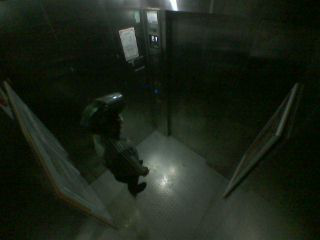

In [104]:
img_name = "../data/12_22_qingpu/2/all/img-0_12_22--11_38_21.jpg"
img = Image.open(img_name)
new = tf.keras.preprocessing.image.apply_brightness_shift(img, 1.0)
Image.fromarray(new.astype('uint8')).convert('RGB')

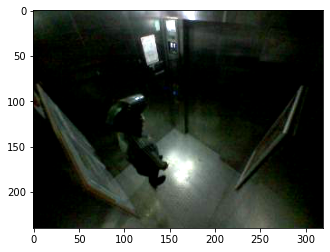

In [107]:
img_name = "../data/12_22_qingpu/2/all/img-0_12_22--11_38_21.jpg"
img = Image.open(img_name)
new = tf.keras.preprocessing.image.apply_brightness_shift(img, 1.0)
img = tf.convert_to_tensor(new.astype('uint8'))
new = tf.image.adjust_contrast(img, 2)
plt.imshow(new)
# Image.fromarray(new.astype('uint8')).convert('RGB')

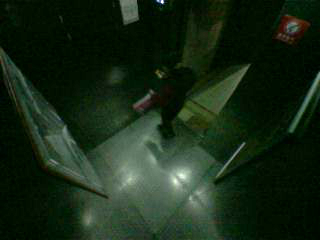

In [6]:
img_name = "../data/12_23_qingpu/1/results_a/negative/img-1_12_23--19_43_37__0.403.jpg"
img = Image.open(img_name)
new = tf.keras.preprocessing.image.apply_brightness_shift(img, 2.0)
Image.fromarray(new.astype('uint8')).convert('RGB')

In [40]:
img_name = "../data/12_22_qingpu/2/results/TP/img-0_12_22--11_38_21__1.000.jpg"
img = Image.open(img_name)
new = tf.keras.preprocessing.image.apply_brightness_shift(img, (2.0))
Image.fromarray(new.astype('uint8')).convert('RGB').save('../data/12_22_qingpu/2/results/TP/111.jpg')

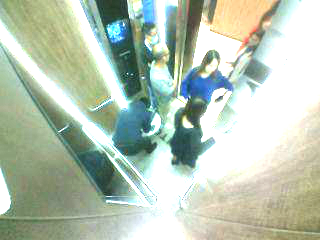

In [38]:
img_name = "../data/LDC/positive/1604379469.jpg"
img = Image.open(img_name)
new = tf.keras.preprocessing.image.apply_brightness_shift(img, (2.0))
Image.fromarray(new.astype('uint8')).convert('RGB')

### 调整图片的亮度并保存

In [11]:
def adjust_brightness(path, dest, brightness):
    for item in os.listdir(path):
        try:
            img = Image.open(path+'/'+item)
            new = tf.keras.preprocessing.image.apply_brightness_shift(img, brightness=brightness)
            Image.fromarray(new.astype('uint8')).convert('RGB').save(dest+'/'+item)
        except Exception as err:
            print(err)

In [13]:
brightness = 2

path = "../../labeled_data/12_22_24_qingpu/qingpu_2_resize"
positive = path+'/positive'
negative = path+'/negative'

dest = "../../labeled_data/12_22_24_qingpu/qingpu_2_resize_brighten"
positive_dest = dest+'/positive'
negative_dest = dest+'/negative'

adjust_brightness(positive, positive_dest, brightness)
adjust_brightness(negative, negative_dest, brightness)

In [45]:
path = "../data/12_23_qingpu/2"

all_path = path+"/all"
positive = path+"/results/positive"
negative = path+"/results/negative"

positive_sets = os.listdir(positive)
for item in os.listdir(all_path):
    if item not in positive_sets:
        shutil.copy(all_path+'/'+item, negative+'/'+item)
    

### 对于分错类别的图片，根据FP中找出的positive的图片，将其再移到positive的类别，并把其从negative类别中删掉

In [23]:
path = '../../labeled_data/12_20_qingpu/2'
positive = path+'/positive'
negative = path+'/negative'

part = '../../results/12_20_qingpu/2/FP/positive'

for img_name in os.listdir(part):
    try:
        new_name = os.path.splitext(img_name)[0].split('__')[0]+'.jpg'
#         print(new_name)
        shutil.copy(part+'/'+img_name, positive+'/'+new_name)
        os.remove(negative+'/'+new_name)
    except Exception as err:
        print(err)

img-0_12_22--13_18_03.jpg
img-0_12_22--18_50_26.jpg
img-0_12_22--19_24_14.jpg
img-1_12_23--13_17_59.jpg
img-0_12_22--20_11_31.jpg
img-0_12_22--17_03_20.jpg
img-0_12_22--15_31_49.jpg
img-0_12_22--19_24_28.jpg
img-0_12_23--09_27_37.jpg
img-0_12_23--07_52_26.jpg
img-0_12_23--07_01_09.jpg
img-0_12_22--11_38_33.jpg
img-1_12_23--13_15_43.jpg
img-0_12_22--16_15_38.jpg
img-0_12_22--22_07_20.jpg
img-0_12_22--18_49_50.jpg
img-0_12_23--08_58_16.jpg
img-0_12_23--07_29_26.jpg
img-1_12_23--13_52_13.jpg
[Errno 2] No such file or directory: '../../labeled_data/12_20_qingpu/2/negative/img-1_12_23--13_52_13.jpg'
img-0_12_22--19_40_18.jpg
img-0_12_22--22_06_05.jpg


### 根据调亮的图片，将原图进行分类

In [7]:
source = '../../labeled_data/12_24_qingpu/all'
dest   = '../../labeled_data/12_24_qingpu/labeled'
# positive = path+'/positive'
# negative = path+'/negative'

part = '../../labeled_data/12_24_qingpu/bright_results'

for subpath in os.listdir(part):
    try:
        for img_name in os.listdir(part+'/'+subpath):
            try:
                new_name = os.path.splitext(img_name)[0].split('__')[0]+'.jpg'
                if new_name in os.listdir(source):
                    shutil.copy(source+'/'+new_name, dest+'/'+subpath+'/'+new_name)
                else:
                    print("%s not in source"%new_name)
            except Exception as err:
                print(err)
    except Exception as err:
        print(err)

.DS_Store.jpg not in source
[Errno 20] Not a directory: '../../labeled_data/12_24_qingpu/bright_results/.DS_Store'
.DS_Store.jpg not in source


### 将多个文件夹里的图片合并到一个文件夹

In [ ]:
def copy_img(source, dest):
    for img in os.listdir(source):
        shutil.copy(source+'/'+img, dest+'/'+img)

In [16]:
import base64
import json
import tensorflow as tf
from PIL import Image

from io import StringIO,BytesIO
import requests

In [3]:
a = {"GatewayID": "60210122000056", "MessageFormat": "Camera", "ElevatorSubID": "0", "SIMCardID": "89860920720003640290", "ReportTime": 1621526402, "UnitNumber": "R2N09333", "Messages": [{"MessageType": "CameraSensor", "Data": {"Score": 0, "Count": 1632, "GwCount": 468, "CaptureTime": 1621526401, "Encode": "Base64", "PictureFormat": "Jpg", "PictureData": "/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCADwAUADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD5aHTmkPTrmk6cUvapIA9KD2oGcHJxmkIx3oAPxxRnI9qOPWgfWgA4xQRik7UUAKMfWl4wBSAc8Gj6daAAevWgnnIoGegpwQ00mwG8Y96U9eakwFXIGTTME9DVODjuFxCDikHfmnlSMU0DnrzU2AQ0HrTse/NGCAabQDR1oH4UDr1oB5x2qQF4xScYPrQetHFACdqUYzQOoxQelACUp4NHajpQADmk6HilH1pO/NMYGlyce1J2ooAKOxoxQPrQAUd6KKACj+VL29DR296BCD60UCigYUv8qQ/WlOM8UhBjnrS+nej+VB7YyaAEPXil9yeaDz6cUhHvzQAoIPvRg49KQY70vUe1ACHpQTxQelKOetACAcZpcAdaU5BpAPemA4Ae1KDz6ik7ijv9atMRIo4OaaOxpY+DkmkbGTge9bzV4pk9TWs4IJ4cMQDisu4i8uZlBJAOM0iSFehNI7EnJOTRUqxnHzFGLTPQvD3wl8R+IvC6a5o0dvdWzB8xrKBICpwRg4578etch4h8Par4euFt9ZsLmymYblWdCu4Zxkeo4PIr1D4N/GJ/A2kPpdxZJdWjTGYZYhlJABA/KmfHjx9pHjmHSp9Oikint1ZJFfB4JBGD+ddToQlFyVrW3v8Aocqq1lVUZLS543/nFJ+NOGCeKTjNeW9zuEzSZpT1pe/NIBOPXmk780ppDQMOlKR6mg4xxR6d6BBgY60lGeaUH16UAJ2oooFMYCj2ooNABQP1oozQAvvQPrikooAPpRRRQApHvQR3pCc0CkIccijPSk/Cge9AATycUvGetIc+lJQAvHOKXAGM0nT/AOvRk4oAM+9IKU+woIoAfnK8UwHjIFC0pzTYBkH604d8UzgnFLxz2px3AevT0pz9jUad6ecbTXRFpxaJe43JBxSHB70nUg+tJ+PNczKHbiAcdKC2QQTxTPpSjHPamm0FhKUfWjj1pD15pAKOo54oOc0lFIA/nRnBooFMYdqU0lFABmg0UCgAooooAKKKKACiiigAooFFABRRR0NABQaKKAHEcfSjHHWkOce9HbrSEGfpSUveg4xxQAdRR07cUDPSjtQADpx0oOe9HpR3oASnE5AOOlIOlC9frTQB39qcDwelIVpMj0oAXPoaeDzioxS9+1UpNBYDjoO1ITSHr0peM+tS3cBKKO1FAwFHeiigApcUlFABRRQKACig0UAFFFFABRQKKACiiigAooooAKKKKACiiigAooooAXvk9KSlzyaPWkIT+VKBxnFB9sUdqAADn0o7DNGOeKU4/GgBDjtQOaDzyBRxjpQAh4opSR6UdvSgBw5GD2pvBPFC4BpSBjimAgH60Ug604jnmgBFGT0pKcT7YptABRS44GelHY0DAfSkPWlI60lAB35opQPekNABRRQeaACiiigAoo/nRQAUUUUAFFFFABRRRQAUUUAE0AFAoooAKKKBQAp60HqcUh70o/zzSEJSn9KD1o79aYAOmcUdMHvQD1z3pTwKQAcZpODRnpQSe3SgBe9JxmgDvmggY4oASl/ho5xzSUwFGPTNBz3opKAFyc8U5VGRuNN5FFIC7cW8Qi3pID7VRp6kkU3HI7UoprRkxTSs3cOwpK2dQi0YaFp0ljLdtqrGQXkcqr5a4I2FCOTkdc9xWNTTuOMuZXCiiimUH8qKKKADiiiigAooooAKKKD9aACiig0AFFFFABRRRQAUUUUABoooPWgBTxwaX+Gk69etBxikIM880Hk8UHrQMigBDmgUuec0HJHtQAgpcHGaQUvqKADPFKOB0pO/NHagBO9KevvRSnpnrQA2lNJmimMU5zRR+tA6GkIUH8qb3pQeKSgBQfU8Uh60UvrmmMQUpPtR+FJ3oAKKX6CkoADRR2ooAKKKKACijtRQAUUdMGigAooooAKKKKACiijvQAUUfSigBSeT60vUCgjPTJpCBj3pCF5GOMUhJoznNJQADrzS9qSg0xgetFAo7UALgetJ2pe3IoOO1IQDikJopQOoxTGJRRR2oAU8fWk7UGgdaACg0UUAAzRRRQAv86SjH5UUAHbrRRRQAp6CkoooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAHZ6UEelNp3fNIQEgmkPQUhPOaKAHN0yKSg9TQcY6GgAP6mkH0oxxQOvWgBegxSHoKXtSdqYxc9KQUUUAHejtRRQAd6B0NHeigANFFFABRRRQAUUd6KACiiigAooooAKKKKACiiigAFFFFABS9jSdTRQAUUUUAFFHGaKACiiigBe1GM0Y4oHXikIT8KKXr0zScimMUe9B6CkPalIGOvNIQDJ6UmOM0UvQ0AJS0Gg9KAD3pDSj0zSEGgAoozxR1NMYUUUv40AB/SkopcZ6UAJRSikoAU+1BGO9J2oPWgAoozRQAUUcUpx2oATPpRRRQAUUUUAAooooADR2ooHXpQAUUvajtQAgHvRRg0d6AFIx9aQ+9H1oNAC989KCPTrRnk0D6UhBx3zS5zwaOBzzmm/wAqAFIwelIf0pVPrQcelACfSiilJpgJS9uRQenTijOD6UgA8UZozxxR9KAE4oJpQM0n8qYxQMmg9AKCMHmk7UhBQaXtxmkpjCg0dqKACij60E5oAKKBS9TQAnaiig0AFFFFABRRRQAUUUUAFFFFAB2ooooAKAcUGigBfWkpfakHWgB2AOtJ6jNB5oIxSEHODSHrS56UGgBKXj1pKX0oAOM0H070lKcUAB6e9HAPrR27UlABQOn0o70o6e1MYAig80lKTkc0hAD7UHr2pQRjB6fyptMBV680lHagUDCig0HrQAGjtQOOaPagAoo7UUALnikNBooAKKKKACiiigAooHQ0UALxn2pKO1FABRRRQAUCiigA6HiiiigB3bnigH8fegn1FGRz70hA3XpxSY4HNKemT0pM+9ACD9KU9KSlGM0AFFJSkkjmgA5x7UHt60A46Ue9AAcelIe/pRS0wEoopT0oGJRSg+wpKACjtR+FKRigAFJSj60lAC9M45FIaDSn8KAAY/Gk/nRRQAGg9M0UUAFFFFABRRRQAUUo5wKSgAoo7UUAFFFLxQAlFFFABRSmkoAXAyfSl4xSYHNLjjg0hAckjFIeKB+tBxnpQAAc0Cg896OcYFACetFOB4pByaAAA4oGT3oOSaOgyKADFJTsZGc0nWgBBR2o7Up96YxKXtSUUAFKaSg0AHfiiilPXrQAlFFKaAE+tHU0UCgAxwKKPr1ooAOKMGiigAFFFH0oAKKD0FFABR2oooAKDnvRR2oAKKD+tFAB2pRjvQATSUAOOOlHbpjNBxjFB9c8UhC8Z5xSY/Ol7+tNHHegA647UcDFIKU/TigA6Udz3o4xxRxQAHOOvFHbrRjjtStjPWgAP1pO/XBoHJo7980AA60E0YNGOKAEpe/NABBo/GgA7UdulJRQAUClHXrQeDTGHHpSHrR+NHegBRmkFFHegANAGaKKACil596SgAo7UvvR26UAJSnHQUlFAC/zpO9FFACkHNGOOKM9KKQhOKXA9aSlPvQAfyoBwc0cYpD9KAP/2Q=="}}], "StorageTime": 1621526402}


In [17]:
imageData = a['Messages'][0]['Data']['PictureData']
img = base64.b64decode(imageData)

# content = requests.get("http://my.cnki.net/Register/CheckCode.aspx?id=1563416120154").content
image = Image.open(BytesIO(img))

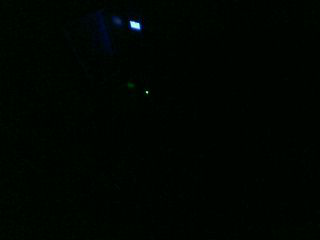

In [18]:
image

In [15]:
Image.frombytes(mode='RGB', size=(320, 240), data=img)

ValueError: not enough image data

In [11]:
tf.keras.preprocessing.image.img_to_array(img)

ValueError: could not convert string to float: b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc0\x00\x11\x08\x00\xf0\x01@\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf2\xf3\xf4\xf5\xf6\xf7\xf8\xf9\xfa\xff\xc4\x00\x1f\x01\x00\x03\x01\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x11\x00\x02\x01\x02\x04\x04\x03\x04\x07\x05\x04\x04\x00\x01\x02w\x00\x01\x02\x03\x11\x04\x05!1\x06\x12AQ\x07aq\x13"2\x81\x08\x14B\x91\xa1\xb1\xc1\t#3R\xf0\x15br\xd1\n\x16$4\xe1%\xf1\x17\x18\x19\x1a&\'()*56789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x82\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf2\xf3\xf4\xf5\xf6\xf7\xf8\xf9\xfa\xff\xda\x00\x0c\x03\x01\x00\x02\x11\x03\x11\x00?\x00\xf9ht\xe6\x90\xf4\xeb\x9aN\x9cR\xf6\xa9 \x0fJ\x0fj\x06prq\x9aB1\xde\x80\x0f\xc7\x14g#\xda\x8e=h\x1fZ\x008\xc5\x04b\x93\xb5\x14\x00\xa3\x1fZ^0\x05 \x1c\xf0h\xfau\xa0\x00z\xf5\xa0\x9er(\x19\xe8)\xc1\r4\x9b\x01\xbcc\xde\x94\xf5\xe6\xa4\xc0U\xc8\x194\xcc\x13\xd0\xd588\xee\x17\x10\x83\x8aA\xdf\x9ayR1M\x03\x9e\xbc\xd4\xd8\x044\x1e\xb4\xec{\xf3F\x08\x06\x9b@4u\xa0~\x14\x0e\xbdh\x07\x9cv\xa9\x01x\xc5\'\x18>\xb4\x1e\xb4q@\t\xda\x94c4\x0e\xa3\x14\x1e\x94\x00\x94\xa7\x83Gj:P\x009\xa4\xe8x\xa5\x1fZN\xfc\xd3\x18\x1a\\\x9c{Rv\xa2\x80\n;\x1a1@\xfa\xd0\x01Gz(\xa0\x02\x8f\xe5K\xdb\xd0\xd1\xdb\xde\x81\x08>\xb4P(\xa0aK\xfc\xa9\x0f\xd6\x94\xe3<R\x10c\x9e\xb4\xbe\x9d\xe8\xfeT\x1e\xd8\xc9\xa0\x04=x\xa5\xf7\'\x9a\x0f>\x9cR\x11\xef\xcd\x00( \xfb\xd1\x83\x8fJA\x8e\xf4\xbdG\xb5\x00!\xe9A<PzR\x8ez\xd0\x02\x01\xc6ip\x07ZS\x90i\x00\xf7\xa6\x03\x80\x1e\xd4\xa0\xf3\xea);\x8a;\xfdj\xd3\x11"\x8e\x0ei\xa3\xb1\xa5\x8f\x83\x92i\x1b\x198\x1e\xf5\xbc\xd5\xe2\x99=Mk8 \x9e\x1c1\x00\xe2\xb2\xee"\xf2\xe6e\x04\x90\x0e3H\x92\x15\xe8M#\xb1\'$\xe4\xd1R\xacg\x1f1F-3\xd0\xbc=\xf0\x97\xc4~"\xf0\xbak\x9a4v\xf7V\xcc\x1f1\xac\xa0H\n\x9c\x11\x83\x8e{\xf1\xeb\\\x87\x88|=\xaa\xf8z\xe1m\xf5\x9b\x0b\x9b)\x98nU\x9d\n\xee\x19\xc6G\xa8\xe0\xf2+\xd4>\r\xfcb\x7f\x03i\x0f\xa5\xdcY%\xd5\xa3Lf\x19b\x19I\x00\x10?*g\xc7\x8f\x1fi\x1e9\x87J\x9fN\x8aH\xa7\xb7VI\x15\xf0x$\x11\x83\xf9\xd7S\xa1\tE\xc9Z\xd6\xde\xff\x00\xa1\xca\xaa\xd6UTd\xb4\xb9\xe3\x7f\xe7\x14\x9f\x8d8`\x9e)8\xcdyos\xb8L\xd2f\x94\xf5\xa5\xef\xcd \x13\x8f^i;\xf3Ji\r\x03\x0e\x94\xa4z\x9a\x0e1\xc5\x1e\x9d\xe8\x10`c\xad%\x19\xe6\x94\x1f^\x94\x00\x9d\xa8\xa2\x81L`(\xf6\xa2\x83@\x05\x03\xf5\xa2\x8c\xd0\x02\xfb\xd0>\xb8\xa4\xa2\x80\x0f\xa5\x14Q@\nG\xbd\x04w\xa4\'4\nB\x1cr(\xcfJO\xc2\x81\xef@\x01<\x9cR\xf1\x9e\xb4\x87>\x94\x94\x00\xbcs\x8a\\\x01\x8c\xd2t\xff\x00\xeb\xd1\x93\x8a\x003\xefH)O\xb0\xa0\x8a\x00~r\xbcS\x01\xe3 P\xb4\xa74\xd8\x06A\xfa\xd3\x87|S8\'\x14\xbcs\xda\x9cw\x01\xeb\xd3\xd2\x9c\xfd\x8dF\x9d\xe9\xe7\x1bMtE\xa7\x16\x89{\x8d\xc9\x07\x14\x87\x07\xbd\'R\x0f\xad\'\xe3\xcds2\x87n \x1ct\xa0\xb6A\x04\xf1L\xfaR\x8cs\xda\x9am\x05\x84\xa5\x1fZ8\xf5\xa4=y\xa4\x02\x8e\xa3\x9e(9\xcd%\x14\x80?\x9d\x19\xc1\xa2\x81La\xda\x94\xd2Q@\x06h4P(\x00\xa2\x8a(\x00\xa2\x8a(\x00\xa2\x8a(\x00\xa2\x81E\x00\x14QGC@\x05\x06\x8a(\x01\xc4q\xf4\xa3\x1cu\xa49\xc7\xbd\x1d\xba\xd2\x10g\xe9IK\xde\x83\x8cq@\x07QGN\xdcP3\xd2\x8e\xd4\x00\x0e\x9ct\xa0\xe7\xbd\x1e\x94w\xa0\x04\xa7\x13\x90\x0e:R\x0e\x94/_\xad4\x01\xdf\xda\x9c\x0f\x07\xa5!ZL\x8fJ\x00\\\xfa\x1ax<\xe2\xa3\x14\xbd\xfbU)4\x16\x03\x8e\x83\xb5!4\x87\xafJ^3\xebR\xdd\xc0J(\xedE\x03\x01Gz(\xa0\x02\x97\x14\x94P\x01E\x14\n\x00(\xa0\xd1@\x05\x14Q@\x05\x14\n(\x00\xa2\x8a(\x00\xa2\x8a(\x00\xa2\x8a(\x00\xa2\x8a(\x00\xa2\x8a(\x01{\xe4\xf4\xa4\xa5\xcf&\x8fZB\x13\xf9R\x81\xc6qA\xf6\xc5\x1d\xa8\x00\x03\x9fJ;\x0c\xd1\x8ex\xa58\xfch\x01\x0e;P9\xa0\xf3\xc8\x14q\x8e\x94\x00\x87\x8a)I\x1e\x94v\xf4\xa0\x07\x0eF\x0fjo\x04\xf1B\xe0\x1aR\x068\xa6\x02\x01\xfa\xd1H:\xd3\x88\xe7\x9a\x00E\x19=))\xc4\xfbb\x9b@\x05\x14\xb8\xe0g\xa5\x1d\x8d\x03\x01\xf4\xa4=iH\xebI@\x07~h\xa5\x03\xde\x90\xd0\x01E\x14\x1eh\x00\xa2\x8a(\x00\xa2\x8f\xe7E\x00\x14QE\x00\x14QE\x00\x14QE\x00\x14Q@\x04\xd0\x01@\xa2\x8a\x00(\xa2\x81@\nz\xd0z\x9cR\x1e\xf4\xa3\xfc\xf3HBR\x9f\xd2\x83\xd6\x8e\xfdi\x80\x0e\x99\xc5\x1d0{\xd0\x0f\\\xf7\xa5<\n@\x07\x19\xa4\xe0\xd1\x9e\x94\x12{t\xa0\x05\xefI\xc6h\x03\xbeh c\x8a\x00J_\xe1\xa3\x9csIL\x05\x18\xf4\xcd\x07=\xe8\xa4\xa0\x05\xc9\xcf\x14\xe5Q\x91\xb8\xd3y\x14R\x02\xed\xc5\xbcB-\xe9 >\xd5F\x9e\xa4\x91M\xc7#\xb5(\xa6\xb4d\xc54\xac\xdd\xc3\xb0\xa4\xad\x9dB-\x18hZt\x962\xdd\xb6\xaa\xc6Ay\x1c\xaa\xbeZ\xe0\x8d\x85\x08\xe4\xe4u\xcfqX\xd4\xd3\xb8\xe3.ep\xa2\x8a)\x94\x1f\xca\x8a(\xa0\x03\x8a(\xa2\x80\n(\xa2\x80\n(\xa0\xfdh\x00\xa2\x8a\r\x00\x14QE\x00\x14QE\x00\x14QE\x00\x06\x8a(=h\x01O\x1c\x1a_\xe1\xa4\xeb\xd7\xad\x07\x18\xa4 \xcf<\xd0y<Pz\xd02(\x01\x0eh\x14\xb9\xe74\x1c\x91\xed@\x08)pq\x9aAK\xea(\x00\xcf\x14\xa3\x81\xd2\x93\xbf4v\xa0\x04\xefJz\xfb\xd1Jzg\xad\x006\x94\xd2f\x8ac\x14\xe74Q\xfa\xd0:\x1aB\x14\x1f\xca\x9b\xde\x94\x1e)(\x01A\xf5<R\x1e\xb4R\xfa\xe6\x98\xc4\x14\xa4\xfbQ\xf8Rw\xa0\x02\x8a_\xa0\xa4\xa0\x00\xd1Gj(\x00\xa2\x8a(\x00\xa2\x8e\xd4P\x01E\x1d0h\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xef@\x05\x14}(\xa0\x05\'\x93\xebK\xd4\n\x08\xcfL\x9aB\x06=\xe9\x08^F8\xc5!&\x8c\xe74\x94\x00\x0e\xbc\xd2\xf6\xa4\xa0\xd3\x18\x1e\xb4P(\xed@\x0b\x81\xebI\xda\x97\xb7"\x83\x8e\xd4\x84\x03\x8aBh\xa5\x03\xa8\xc51\x89E\x14v\xa0\x05<}i;Ph\x1dh\x00\xa0\xd1E\x00\x034QE\x00/\xf3\xa4\xa3\x1f\x95\x14\x00v\xebE\x14P\x02\x9e\x82\x92\x8a(\x00\xa2\x8a(\x00\xa2\x8a(\x00\xa2\x8a(\x00\xa2\x8a(\x00\xa2\x8a(\x00\xa2\x8a(\x00\xa2\x8a(\x01\xd9\xe9A\x1e\x94\xdaw|\xd2\x10\x12\t\xa4=\x05!<\xe6\x8a\x00st\xc8\xa4\xa0\xf54\x1cc\xa1\xa0\x00\xfe\xa6\x90}(\xc7\x14\x0e\xbdh\x01z\x0cR\x1e\x82\x97\xb5\'jc\x17=)\x05\x14P\x01\xde\x8e\xd4Q@\x07z\x07CGz(\x004QE\x00\x14QE\x00\x14Q\xde\x8a\x00(\xa2\x8a\x00(\xa2\x8a\x00(\xa2\x8a\x00(\xa2\x8a\x00\x05\x14Q@\x05/cI\xd4\xd1@\x05\x14Q@\x05\x14q\x9a(\x00\xa2\x8a(\x01{Q\x8c\xd1\x8e(\x1dx\xa4!?\n)z\xf4\xcd\'"\x98\xc5\x1e\xf4\x1e\x82\x90\xf6\xa5 c\xaf4\x84\x03\'\xa5&8\xcd\x14\xbd\r\x00%-\x06\x83\xd2\x80\x0fzCJ=3HA\xa0\x02\x8a3\xc5\x1dM1\x85\x14R\xfe4\x00\x1f\xd2\x92\x8a\\g\xa5\x00%\x14\xa2\x92\x80\x14\xfbPF;\xd2v\xa0\xf5\xa0\x02\x8a3E\x00\x14Q\xc5)\xc7j\x00L\xfaQE\x14\x00QE\x14\x00\n(\xa2\x80\x03Gj(\x1dzP\x01E/j;P\x02\x01\xefE\x184w\xa0\x05#\x1fZC\xefG\xd6\x83@\x0b\xdf=(#\xd3\xad\x19\xe4\xd0>\x94\x84\x1cw\xcd.s\xc1\xa3\x81\xcf9\xa6\xff\x00*\x00R0zR\x1f\xd2\x95O\xad\x07\x1e\x94\x00\x9fJ(\xa5&\x98\tK\xdb\x91A\xe9\xd3\x8a3\x83\xe9H\x00\xf1Fh\xcf\x1cQ\xf4\xa0\x04\xe2\x82i@\xcd\'\xf2\xa61@\xc9\xa0\xf4\x02\x820y\xa4\xedHAA\xa5\xed\xc6i)\x8c(4v\xa2\x80\n(\xfa\xd0Nh\x00\xa2\x81K\xd4\xd0\x02v\xa2\x8a\r\x00\x14QE\x00\x14QE\x00\x14QE\x00\x14QE\x00\x1d\xa8\xa2\x8a\x00(\x07\x14\x1a(\x01}i)}\xa9\x07Z\x00v\x00\xebI\xea3A\xe6\x821HA\xce\r!\xebK\x9e\x94\x1a\x00J^=i)}(\x00\xe34\x1fN\xf4\x94\xa7\x14\x00\x1e\x9e\xf4p\x0f\xad\x1d\xbbRP\x01@\xe9\xf4\xa3\xbd(\xe9\xedL`\x08\xa0\xf3IJNG4\x84\x00\xfbPz\xf6\xa5\x04c\x07\xa7\xf2\xa6\xd3\x01W\xaf4\x94v\xa0P0\xa2\x83A\xeb@\x01\xa3\xb5\x03\x8eh\xf6\xa0\x02\x8a;Q@\x0b\x9e)\r\x06\x8a\x00(\xa2\x8a\x00(\xa2\x8a\x00(\xa0t4P\x02\xf1\x9fjJ;Q@\x05\x14Q@\x05\x02\x8a(\x00\xe8x\xa2\x8a(\x01\xdd\xb9\xe2\x80\x7f\x1fz\t\xf5\x14ds\xefH@\xddzqI\x8e\x074\xa7\xa6OJL\xfb\xd0\x02\x0f\xd2\x94\xf4\xa4\xa5\x18\xcd\x00\x14RR\x92H\xe6\x80\x0eq\xedA\xed\xeb@8\xe9G\xbd\x00\x07\x1e\x94\x87\xbf\xa5\x14\xb4\xc0J(\xa5=(\x18\x94R\x83\xec)(\x00\xa3\xb5\x1f\x85)\x18\xa0\x00RR\x8f\xad%\x00/L\xe3\x91Hh4\xa7\xf0\xa0\x00c\xf1\xa4\xfetQ@\x01\xa0\xf4\xcd\x14P\x01E\x14P\x01E\x14P\x01E(\xe7\x02\x92\x80\n(\xedE\x00\x14QK\xc5\x00%\x14Q@\x05\x14\xa6\x92\x80\x17\x03\'\xd2\x97\x8cR`sK\x8e84\x84\x07$\x8cR\x1e(\x1f\xad\x07\x19\xe9@\x00\x1c\xd0(<\xf7\xa3\x9c`P\x02z\xd1N\x07\x8aA\xc9\xa0\x00\x03\x8a\x06Oz\x0eI\xa3\xa0\xc8\xa0\x03\x14\x94\xecdg4\x9dh\x01\x05\x1d\xa8\xedJ}\xe9\x8cJ^\xd4\x94P\x01Ji(4\x00w\xe2\x8a)O^\xb4\x00\x94QJh\x01>\xb4u4P(\x00\xc7\x02\x8a>\xbdh\xa0\x03\x8a0h\xa2\x80\x01E\x14}(\x00\xa2\x83\xd0Q@\x05\x1d\xa8\xa2\x80\n\x0e{\xd1Gj\x00(\xa0\xfe\xb4P\x01\xda\x94c\xbd\x00\x13I@\x0e8\xe9Gn\x98\xcd\x07\x18\xc5\x07\xd7<R\x10\xbcg\x9cRc\xf3\xa5\xef\xebM\x1cw\xa0\x03\xae;Q\xc0\xc5 \xa5?N(\x00\xe9Gs\xde\x8e1\xc5\x1cP\x00s\x8e\xbcQ\xdb\xad\x18\xe3\xb5+c=h\x00?ZN\xfdph\x1c\x9a;\xf7\xcd\x00\x03\xad\x04\xd1\x83F8\xa0\x04\xa5\xef\xcd\x00\x10h\xfch\x00\xedGn\x94\x94P\x01@\xa5\x1dz\xd0x4\xc6\x1czR\x1e\xb4~4w\xa0\x05\x19\xa4\x14Q\xde\x80\x03@\x19\xa2\x8a\x00(\xa5\xe7\xde\x92\x80\n;R\xfb\xd1\xdb\xa5\x00%)\xc7AIE\x00/\xf3\xa4\xefE\x14\x00\xa4\x1c\xd1\x8e8\xa3=(\xa4!8\xa5\xc0\xf5\xa4\xa5>\xf4\x00\x7f*\x01\xc1\xcd\x1cb\x90\xfd(\x03\xff\xd9'